In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Uber Lyft Prediction").getOrCreate()

In [2]:
df = spark.read.csv("rideshare_kaggle.csv", header=True, inferSchema=True)
df.show()

+--------------------+----------------+----+---+-----+-------------------+----------------+----------------+--------------------+--------+--------------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|       timestamp|hour|day|month|           datetime|        timezone|          source|         destination

In [3]:
df = df.select(['source','destination','price','distance','cab_type','name','surge_multiplier'])
df.show()

+----------------+--------------------+-----+--------+--------+------------+----------------+
|          source|         destination|price|distance|cab_type|        name|surge_multiplier|
+----------------+--------------------+-----+--------+--------+------------+----------------+
|Haymarket Square|       North Station|    5|    0.44|    Lyft|      Shared|             1.0|
|Haymarket Square|       North Station|   11|    0.44|    Lyft|         Lux|             1.0|
|Haymarket Square|       North Station|    7|    0.44|    Lyft|        Lyft|             1.0|
|Haymarket Square|       North Station|   26|    0.44|    Lyft|Lux Black XL|             1.0|
|Haymarket Square|       North Station|    9|    0.44|    Lyft|     Lyft XL|             1.0|
|Haymarket Square|       North Station| 16.5|    0.44|    Lyft|   Lux Black|             1.0|
|        Back Bay|Northeastern Univ...| 10.5|    1.08|    Lyft|     Lyft XL|             1.0|
|        Back Bay|Northeastern Univ...| 16.5|    1.08|    Ly

In [4]:
df.printSchema()

root
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- surge_multiplier: double (nullable = true)



In [5]:
df = df.replace("NA", None)
df = df.dropna()
df.show()

+----------------+--------------------+-----+--------+--------+------------+----------------+
|          source|         destination|price|distance|cab_type|        name|surge_multiplier|
+----------------+--------------------+-----+--------+--------+------------+----------------+
|Haymarket Square|       North Station|    5|    0.44|    Lyft|      Shared|             1.0|
|Haymarket Square|       North Station|   11|    0.44|    Lyft|         Lux|             1.0|
|Haymarket Square|       North Station|    7|    0.44|    Lyft|        Lyft|             1.0|
|Haymarket Square|       North Station|   26|    0.44|    Lyft|Lux Black XL|             1.0|
|Haymarket Square|       North Station|    9|    0.44|    Lyft|     Lyft XL|             1.0|
|Haymarket Square|       North Station| 16.5|    0.44|    Lyft|   Lux Black|             1.0|
|        Back Bay|Northeastern Univ...| 10.5|    1.08|    Lyft|     Lyft XL|             1.0|
|        Back Bay|Northeastern Univ...| 16.5|    1.08|    Ly

In [6]:
for i in df.columns:
  print(i+":",df[df[i].isNull()].count())

source: 0
destination: 0
price: 0
distance: 0
cab_type: 0
name: 0
surge_multiplier: 0


In [7]:
df.show()

+----------------+--------------------+-----+--------+--------+------------+----------------+
|          source|         destination|price|distance|cab_type|        name|surge_multiplier|
+----------------+--------------------+-----+--------+--------+------------+----------------+
|Haymarket Square|       North Station|    5|    0.44|    Lyft|      Shared|             1.0|
|Haymarket Square|       North Station|   11|    0.44|    Lyft|         Lux|             1.0|
|Haymarket Square|       North Station|    7|    0.44|    Lyft|        Lyft|             1.0|
|Haymarket Square|       North Station|   26|    0.44|    Lyft|Lux Black XL|             1.0|
|Haymarket Square|       North Station|    9|    0.44|    Lyft|     Lyft XL|             1.0|
|Haymarket Square|       North Station| 16.5|    0.44|    Lyft|   Lux Black|             1.0|
|        Back Bay|Northeastern Univ...| 10.5|    1.08|    Lyft|     Lyft XL|             1.0|
|        Back Bay|Northeastern Univ...| 16.5|    1.08|    Ly

In [8]:
df.printSchema()

root
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- surge_multiplier: double (nullable = true)



In [9]:
from pyspark.ml.feature import StringIndexer
string_columns = ["source", "destination", "cab_type", "name","price"]
for column in string_columns:
    string_indexer = StringIndexer(inputCol=column, outputCol=f"{column}_index")
    df = string_indexer.fit(df).transform(df)
df.show()

+----------------+--------------------+-----+--------+--------+------------+----------------+------------+-----------------+--------------+----------+-----------+
|          source|         destination|price|distance|cab_type|        name|surge_multiplier|source_index|destination_index|cab_type_index|name_index|price_index|
+----------------+--------------------+-----+--------+--------+------------+----------------+------------+-----------------+--------------+----------+-----------+
|Haymarket Square|       North Station|    5|    0.44|    Lyft|      Shared|             1.0|         8.0|             11.0|           1.0|      11.0|       13.0|
|Haymarket Square|       North Station|   11|    0.44|    Lyft|         Lux|             1.0|         8.0|             11.0|           1.0|       6.0|       10.0|
|Haymarket Square|       North Station|    7|    0.44|    Lyft|        Lyft|             1.0|         8.0|             11.0|           1.0|       9.0|        0.0|
|Haymarket Square|    

In [10]:
columns_to_drop = ["source", "destination", "cab_type", "name","price"]
df = df.drop(*columns_to_drop)
for col in df.columns:
  print("Correlation to chance of admit Col {} is {}".format(col,df.stat.corr('price_index',col)))

Correlation to chance of admit Col distance is 0.25336646951581826
Correlation to chance of admit Col surge_multiplier is 0.09602948435116548
Correlation to chance of admit Col source_index is -0.0756015703592839
Correlation to chance of admit Col destination_index is -0.04698679510213292
Correlation to chance of admit Col cab_type_index is -0.38772239704884986
Correlation to chance of admit Col name_index is -0.42177740307921097
Correlation to chance of admit Col price_index is 1.0


In [11]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Split the data randomly into train and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Define feature columns
feature_columns = ["distance", "surge_multiplier", "source_index", "destination_index", "cab_type_index", "name_index"]

# Create a VectorAssembler
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Create a GBTRegressor
gbt_regressor = GBTRegressor(featuresCol='features', labelCol='price_index')

# Create a pipeline
pipeline = Pipeline(stages=[vector_assembler, gbt_regressor])

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

In [13]:
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'predictions' with columns 'label' and 'prediction'
evaluator = RegressionEvaluator(labelCol="price_index", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="price_index", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="price_index", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="price_index", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 90.80037906839223
Root Mean Squared Error (RMSE): 9.528923290088562
Mean Absolute Error (MAE): 6.212597625372304
R-squared (R2): 0.635627492360588


c:\Users\vp140\.conda\envs\pycaretenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vp140\.conda\envs\pycaretenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


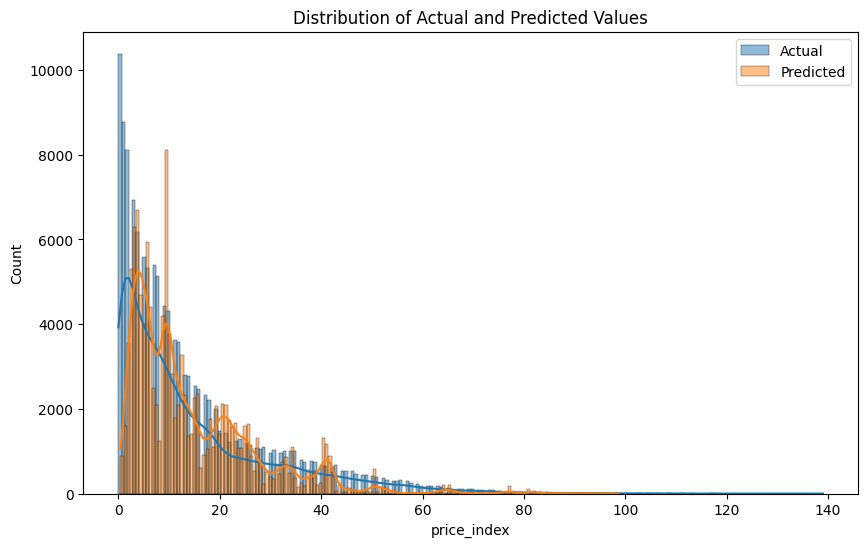

In [14]:
# Plot predictions
predictions = predictions.toPandas()
plt.figure(figsize=(10, 6))
sns.histplot(predictions['price_index'], label='Actual', kde=True)
sns.histplot(predictions['prediction'], label='Predicted', kde=True)
plt.legend()
plt.title('Distribution of Actual and Predicted Values')
plt.show()

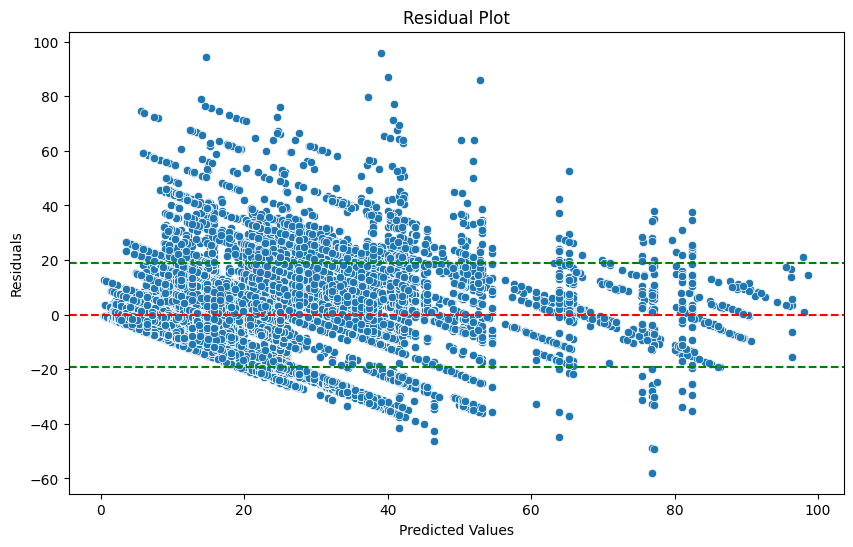

In [15]:
# Residual plot
predictions['residual'] = predictions['price_index'] - predictions['prediction']
mean_residual = predictions['residual'].mean()
std_residual = predictions['residual'].std()


plt.figure(figsize=(10, 6))
sns.scatterplot(x="prediction", y="residual", data=predictions)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=mean_residual + 2*std_residual, color='g', linestyle='--')
plt.axhline(y=mean_residual - 2*std_residual, color='g', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()